In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from datetime import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Wczytanie danych

In [2]:
shp_world = gpd.read_file('../data/world_countries/World_Countries__Generalized_.shp')
shp_world

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.7439 -14.37555, -170.74942 -14...."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."
...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137..."
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096..."


In [3]:
big_macs_data = pd.read_csv('../data/big-mac-full-index.csv')
big_macs_data

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_bigmac,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.0000,2.500000,0.11607,0.05007,-0.16722,-0.09864,1.09091,8317.724800,1.941077,0.36397,NaN,-0.07809,0.09763,0.96247
1,2000-04-01,AUS,AUD,Australia,2.59,1.6800,1.541667,-0.31176,-0.35246,-0.48645,-0.44416,0.28939,28023.744000,2.287635,-0.28631,NaN,-0.51761,-0.42567,0.02686
2,2000-04-01,BRA,BRL,Brazil,2.95,1.7900,1.648045,-0.26427,-0.30778,-0.45102,-0.40581,0.37836,4511.789017,1.874144,-0.06873,NaN,-0.37055,-0.25058,0.33990
3,2000-04-01,CAN,CAD,Canada,2.85,1.4700,1.938776,-0.13448,-0.18566,-0.35417,-0.30099,0.62152,24539.928589,2.226367,-0.07777,NaN,-0.37666,-0.25785,0.32689
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.7000,3.470588,0.54937,0.45774,0.15609,0.25130,1.90267,23524.312569,2.208506,0.66423,NaN,0.12486,0.33926,1.39447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,2025-01-01,URY,UYU,Uruguay,299.00,43.2700,6.910099,0.19345,0.16079,0.20684,1.22210,0.96405,16280.833689,4.318840,0.48336,0.27367,0.35726,1.55658,0.99265
1890,2025-01-01,USA,USD,United States,5.79,1.0000,5.790000,0.00000,-0.02737,0.01122,0.86191,0.64569,82715.100000,5.367929,0.00000,-0.14136,-0.08501,0.72351,0.34334
1891,2025-01-01,VEN,VES,Venezuela,252.00,56.5814,4.453760,-0.23078,-0.25184,-0.22215,0.43221,0.26589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,2025-01-01,VNM,VND,Vietnam,76000.00,25078.0000,3.030545,-0.47659,-0.49092,-0.47072,-0.02546,-0.13863,7764.116477,4.184349,-0.32854,-0.42345,-0.38562,0.15727,-0.09800


# Przygotowanie danych

## Wybranie tylko najnowszych danych

In [4]:
big_macs_data['date'] = pd.to_datetime(big_macs_data['date']).dt.year
big_macs_data

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_bigmac,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000,ARG,ARS,Argentina,2.50,1.0000,2.500000,0.11607,0.05007,-0.16722,-0.09864,1.09091,8317.724800,1.941077,0.36397,NaN,-0.07809,0.09763,0.96247
1,2000,AUS,AUD,Australia,2.59,1.6800,1.541667,-0.31176,-0.35246,-0.48645,-0.44416,0.28939,28023.744000,2.287635,-0.28631,NaN,-0.51761,-0.42567,0.02686
2,2000,BRA,BRL,Brazil,2.95,1.7900,1.648045,-0.26427,-0.30778,-0.45102,-0.40581,0.37836,4511.789017,1.874144,-0.06873,NaN,-0.37055,-0.25058,0.33990
3,2000,CAN,CAD,Canada,2.85,1.4700,1.938776,-0.13448,-0.18566,-0.35417,-0.30099,0.62152,24539.928589,2.226367,-0.07777,NaN,-0.37666,-0.25785,0.32689
4,2000,CHE,CHF,Switzerland,5.90,1.7000,3.470588,0.54937,0.45774,0.15609,0.25130,1.90267,23524.312569,2.208506,0.66423,NaN,0.12486,0.33926,1.39447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,2025,URY,UYU,Uruguay,299.00,43.2700,6.910099,0.19345,0.16079,0.20684,1.22210,0.96405,16280.833689,4.318840,0.48336,0.27367,0.35726,1.55658,0.99265
1890,2025,USA,USD,United States,5.79,1.0000,5.790000,0.00000,-0.02737,0.01122,0.86191,0.64569,82715.100000,5.367929,0.00000,-0.14136,-0.08501,0.72351,0.34334
1891,2025,VEN,VES,Venezuela,252.00,56.5814,4.453760,-0.23078,-0.25184,-0.22215,0.43221,0.26589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,2025,VNM,VND,Vietnam,76000.00,25078.0000,3.030545,-0.47659,-0.49092,-0.47072,-0.02546,-0.13863,7764.116477,4.184349,-0.32854,-0.42345,-0.38562,0.15727,-0.09800


In [5]:
data = big_macs_data[big_macs_data['date']==2025][['name', 'dollar_price']]
data

,name,dollar_price
1840,United Arab Emirates,4.900760
1841,Argentina,6.952380
1842,Australia,4.870488
1843,Azerbaijan,3.670588
1844,Bahrain,4.509284
1845,Brazil,4.025806
1846,Canada,5.429455
1847,Switzerland,7.992452
1848,Chile,4.547987
1849,China,3.518285


In [6]:
data = data.rename(columns={'name': 'COUNTRY'})
data

,COUNTRY,dollar_price
1840,United Arab Emirates,4.900760
1841,Argentina,6.952380
1842,Australia,4.870488
1843,Azerbaijan,3.670588
1844,Bahrain,4.509284
1845,Brazil,4.025806
1846,Canada,5.429455
1847,Switzerland,7.992452
1848,Chile,4.547987
1849,China,3.518285


## Dopasowanie nazw krajów w shapefie do nazw krajów w danych Big Macach

In [7]:
countries_not_in_shp = set(data['COUNTRY']) - set(shp_world['COUNTRY'])
countries_not_in_shp

{'Britain', 'Euro area', 'Hong Kong', 'Taiwan', 'Turkey'}

In [8]:
country_mapper = {
    'Britain': 'United Kingdom',
    'Turkey': 'Turkiye',
}

In [9]:
data['COUNTRY'] = data['COUNTRY'].replace(country_mapper)
data['COUNTRY']

1840    United Arab Emirates
1841               Argentina
1842               Australia
1843              Azerbaijan
1844                 Bahrain
1845                  Brazil
1846                  Canada
1847             Switzerland
1848                   Chile
1849                   China
1850                Colombia
1851              Costa Rica
1852          Czech Republic
1853                 Denmark
1854                   Egypt
1855               Euro area
1856          United Kingdom
1857               Guatemala
1858               Hong Kong
1859                Honduras
1860                 Hungary
1861               Indonesia
1862                   India
1863                  Israel
1864                  Jordan
1865                   Japan
1866             South Korea
1867                  Kuwait
1868                 Lebanon
1869                 Moldova
1870                  Mexico
1871                Malaysia
1872               Nicaragua
1873                  Norway
1874          

In [10]:
data

,COUNTRY,dollar_price
1840,United Arab Emirates,4.900760
1841,Argentina,6.952380
1842,Australia,4.870488
1843,Azerbaijan,3.670588
1844,Bahrain,4.509284
1845,Brazil,4.025806
1846,Canada,5.429455
1847,Switzerland,7.992452
1848,Chile,4.547987
1849,China,3.518285


## Podzielenie Euro Zone na kraje

In [11]:
euro_area_countries = ['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Estonia', 'Finland', 'France',
                       'Germany', 'Greece', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
                       'Malta', 'Netherlands', 'Portugal', 'Slovakia', 'Slovenia', 'Spain']

In [12]:
value = data[data['COUNTRY']=='Euro area']['dollar_price'].values[0]
values = [value] * len(euro_area_countries)

In [13]:
euro_area_countries_df = pd.DataFrame({
    'COUNTRY': euro_area_countries,
    'dollar_price': values
})

In [14]:
data = pd.concat([data, euro_area_countries_df], ignore_index=True)
data

,COUNTRY,dollar_price
0,United Arab Emirates,4.900760
1,Argentina,6.952380
2,Australia,4.870488
3,Azerbaijan,3.670588
4,Bahrain,4.509284
...,...,...
69,Netherlands,5.952943
70,Portugal,5.952943
71,Slovakia,5.952943
72,Slovenia,5.952943


## Połączenie zbiorów

In [15]:
shp_world = shp_world.merge(data, how='left', on='COUNTRY')
shp_world

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,dollar_price
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",NaN
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569...",NaN
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...",NaN
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.7439 -14.37555, -170.74942 -14....",NaN
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...",NaN
...,...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ...",3.030545
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137...",NaN
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13...",NaN
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096...",NaN


In [16]:
print(shp_world['geometry'].crs)

EPSG:4326


## Zmiana geometrii danych

In [17]:
shp_world['geometry'] = shp_world['geometry'].to_crs({'proj': 'cea'})
shp_world

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,dollar_price
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((6821274.81 3694248.004, 6823482.06 3...",NaN
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((2178614.504 4221649.22, 2179852.165 ...",NaN
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((512443.03 3808984.977, 516027.527 38...",NaN
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-19007124.005 -1573374.351, -1900773...",NaN
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((160949.743 4297258.651, 165479.439 4...",NaN
...,...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((11919975.671 1864444.092, 1192...",3.030545
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-19821639.593 -1567835.314, -1...",NaN
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((5260340.777 1491739.909, 52508...",NaN
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((3363297.789 -1638268.289, 3363981.86...",NaN


## Dodanie potrzebnych kolumn

In [18]:
shp_world['SHAPE_Area'] = shp_world['geometry'].area / 10**6
shp_world['SHAPE_Leng'] = shp_world['geometry'].length / 1000
shp_world['country_name_len'] = shp_world['COUNTRY'].apply(lambda x: len(x))
shp_world

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,dollar_price,country_name_len
0,1,Afghanistan,AF,Afghanistan,AF,5301.331428,6.419074e+05,"POLYGON ((6821274.81 3694248.004, 6823482.06 3...",NaN,11
1,2,Albania,AL,Albania,AL,930.080165,2.865394e+04,"POLYGON ((2178614.504 4221649.22, 2179852.165 ...",NaN,7
2,3,Algeria,DZ,Algeria,DZ,7464.227480,2.317515e+06,"POLYGON ((512443.03 3808984.977, 516027.527 38...",NaN,7
3,4,American Samoa,AS,United States,US,66.260013,1.637721e+02,"POLYGON ((-19007124.005 -1573374.351, -1900773...",NaN,14
4,5,Andorra,AD,Andorra,AD,95.723830,5.071533e+02,"POLYGON ((160949.743 4297258.651, 165479.439 4...",NaN,7
...,...,...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,7273.501855,3.242782e+05,"MULTIPOLYGON (((11919975.671 1864444.092, 1192...",3.030545,7
247,248,Wallis and Futuna,WF,France,FR,76.608183,1.604782e+02,"MULTIPOLYGON (((-19821639.593 -1567835.314, -1...",NaN,17
248,249,Yemen,YE,Yemen,YE,3727.096719,4.535719e+05,"MULTIPOLYGON (((5260340.777 1491739.909, 52508...",NaN,5
249,250,Zambia,ZM,Zambia,ZM,5390.278333,7.519176e+05,"POLYGON ((3363297.789 -1638268.289, 3363981.86...",NaN,6


In [19]:
shp_world['big_mac_dollar_price_per_border_1000_km'] = shp_world['dollar_price'] / shp_world['SHAPE_Leng'] * 1000
shp_world['big_mac_dollar_price_per_100k_km2'] = shp_world['dollar_price'] / shp_world['SHAPE_Area'] * 100_000
shp_world['big_mac_dollar_price_per_name_len'] = shp_world['dollar_price'] / shp_world['country_name_len']

# Wizualizacja

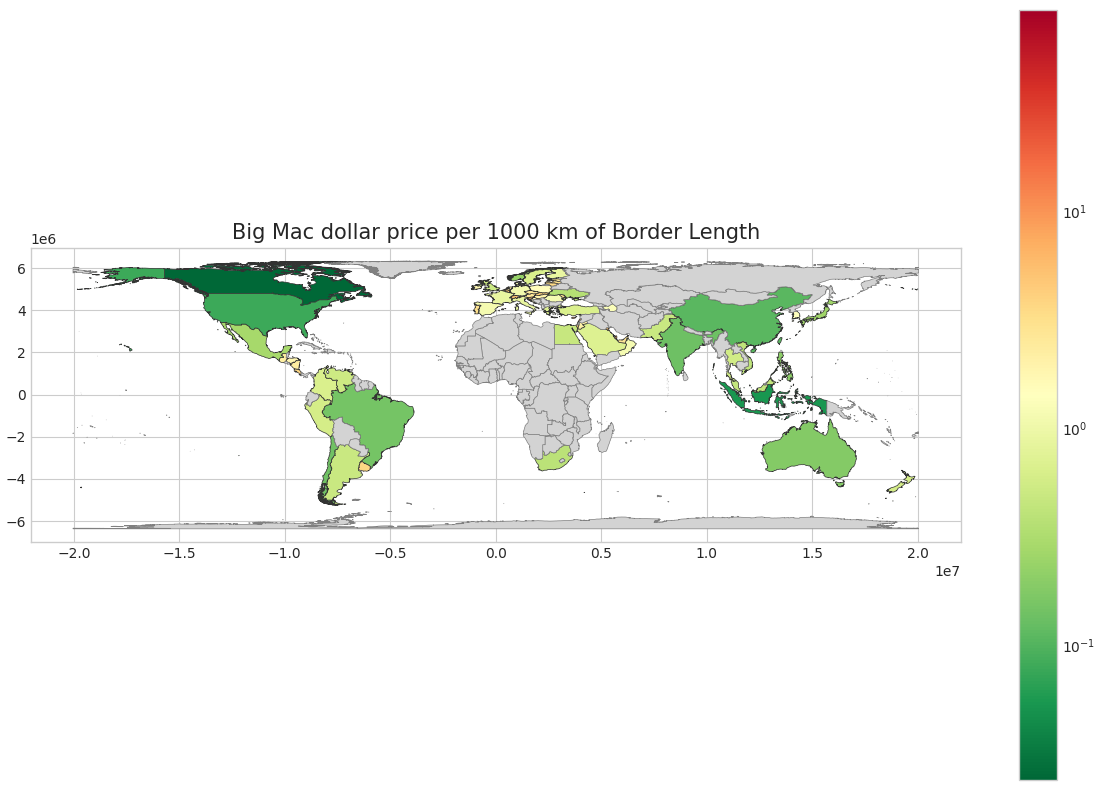

In [20]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    fig, ax = plt.subplots(1, figsize=(15, 10))

    ax.set_title('Big Mac dollar price per 1000 km of Border Length', fontdict={'fontsize': '15', 'fontweight' : '3'})

    fig = shp_world.plot(column='big_mac_dollar_price_per_border_1000_km', cmap='RdYlGn_r', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True,
                         norm=colors.LogNorm(
                            vmin=shp_world['big_mac_dollar_price_per_border_1000_km'].replace(0, np.nan).min(),
                            vmax=shp_world['big_mac_dollar_price_per_border_1000_km'].max()
                        ),
                         missing_kwds={
                             "color": "lightgrey",
                             "edgecolor": "grey",
                            #  "hatch": "///",
                             "label": "Missing values",
                         })
    
    plt.savefig('../maps/big_mac_dollar_price_per_border_1000_km.png', dpi=600, bbox_inches='tight')

In [21]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    fig, ax = plt.subplots(1, figsize=(15, 10))

    ax.set_title('Big Mac dollar price per 100k km²', fontdict={'fontsize': '15', 'fontweight' : '3'})

    fig = shp_world.plot(column='big_mac_dollar_price_per_100k_km2', cmap='RdYlGn_r', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True,
                         norm=colors.LogNorm(
                            vmin=shp_world['big_mac_dollar_price_per_100k_km2'].replace(0, np.nan).min(),
                            vmax=shp_world['big_mac_dollar_price_per_100k_km2'].max()
                        ),
                         missing_kwds={
                             "color": "lightgrey",
                             "edgecolor": "grey",
                            #  "hatch": "///",
                             "label": "Missing values",
                         })
    
    plt.savefig('../maps/big_mac_dollar_price_per_100k_km2.png', dpi=600, bbox_inches='tight')

In [22]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    fig, ax = plt.subplots(1, figsize=(15, 10))

    ax.set_title('Big Mac dollar price per country name length', fontdict={'fontsize': '15', 'fontweight' : '3'})

    fig = shp_world.plot(column='big_mac_dollar_price_per_name_len', cmap='RdYlGn_r', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True,
                         norm=colors.LogNorm(
                            vmin=shp_world['big_mac_dollar_price_per_name_len'].replace(0, np.nan).min(),
                            vmax=shp_world['big_mac_dollar_price_per_name_len'].max()
                        ),
                         missing_kwds={
                             "color": "lightgrey",
                             "edgecolor": "grey",
                            #  "hatch": "///",
                             "label": "Missing values",
                         })
    
    plt.savefig('../maps/big_mac_dollar_price_per_name_len.png', dpi=600, bbox_inches='tight')